# **Part-3: Selecting the Optimal Polynomial Degree**

**3.1- Select the best degree of the polynomial automatically (degree = [1..4])**

**Explanation:**
- This section of code starts by importing essential libraries for handling numerical operations and plotting graphs, such as NumPy for mathematical computations and Matplotlib for creating visualizations. The PolynomialFeatures from Scikit-learn is used to generate polynomial features from the input data, which allows transforming linear data into higher-degree polynomials.

- It then imports LinearRegression, a basic machine learning model used to fit a line (or curve, in the case of polynomial regression) to the data. The Pipeline is included to streamline the process by chaining steps like generating polynomial features and fitting the model together.

- For splitting the dataset, train_test_split is used to divide the data into training and testing sets, while StratifiedKFold ensures that cross-validation is performed with balanced folds, maintaining the distribution of the target variable across different folds.

- Finally, the section includes tools for evaluation, such as mean_squared_error to measure the performance of the model by calculating the average squared differences between predicted and actual values. The load_diabetes function is used to load a pre-existing dataset for modeling diabetes progression. Together, these components build a workflow for creating, training, validating, and evaluating a polynomial regression model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

**Explanation**

In this section, the dataset is loaded using the load_diabetes() function, which retrieves the built-in diabetes dataset from Scikit-learn. This dataset contains medical data on diabetes progression in patients.

- diabetes.data is assigned to the variable X, which contains the feature matrix. This matrix includes various medical measurements (like age, BMI, blood pressure, etc.) that serve as input features for the model.
  
- diabetes.target is assigned to the variable y, which represents the target variable, or the outcome we aim to predict. In this case, it indicates a quantitative measure of disease progression (a continuous value).

Thus, X holds the input data, and y contains the corresponding labels or targets for prediction.

In [5]:
# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

**Explanation**

In this section, I split the dataset into training and test sets using train_test_split, with 80% of the data for training and 20% for testing. I set random_state=1010 to ensure reproducibility and shuffle=True to randomly mix the data.

Next, I create a StratifiedKFold splitter with 5 folds, which will help me perform cross-validation while ensuring that the target variable distribution is balanced across folds.

I define a range of polynomial degrees (1 to 4) to test and set up an empty list, mean_mse_per_degree, where I'll store the mean MSE for each degree after cross-validation.

In [6]:
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010, shuffle=True)

# Create the StratifiedKFold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1010)

# Range of polynomial degrees to test
degrees = [1, 2, 3, 4]

# To store mean MSE for each degree
mean_mse_per_degree = []

**Explanation**

In this part, I loop through each polynomial degree (from 1 to 4) and perform the following steps for each:

- **Initialize scores**:  
   I start by creating an empty list called scores to store the MSE for each fold.

- **Create a pipeline**:  
   For each degree, I set up a pipeline with two steps: first, PolynomialFeatures to transform the data into the specified degree, and then `LinearRegression to fit the transformed data.

- **Cross-validation**:  
   I perform 5-fold cross-validation using `StratifiedKFold. For each fold, I:
   - Fit the pipeline to the training data (train fold).
   - Predict the target values for the validation data (validation fold).
   - Calculate the MSE for the validation fold and store it in the `scores list.

- **Calculate mean MSE**:  
   After completing the cross-validation for that degree, I calculate the mean MSE across all folds and store it in `mean_mse_per_degree. I also print the degree and its corresponding mean MSE to monitor the performance of each polynomial degree.

In [7]:
# Loop through the polynomial degrees
for degree in degrees:
    scores = []

    # Create a pipeline for each degree of polynomial
    pipe = Pipeline(steps=[('preprocessor', PolynomialFeatures(degree=degree)),
                           ('estimator', LinearRegression())])

    # Perform cross-validation
    for i, (train_index, val_index) in enumerate(skf.split(X_train, np.digitize(y_train, bins=np.percentile(y_train, [50])))):
        # Fit the model on the training fold
        pipe.fit(X_train[train_index], y_train[train_index])

        # Predict on the validation fold
        y_pred = pipe.predict(X_train[val_index])

        # Calculate MSE for the validation fold
        mse = mean_squared_error(y_train[val_index], y_pred)
        scores.append(mse)

    # Calculate mean MSE for this degree
    mean_mse = np.mean(scores)
    mean_mse_per_degree.append(mean_mse)
    print(f"Degree {degree}, Mean MSE: {mean_mse:.2f}")

Degree 1, Mean MSE: 3059.12
Degree 2, Mean MSE: 4821.44
Degree 3, Mean MSE: 55791550.46
Degree 4, Mean MSE: 149958.86


**3.2- Plot the MSE value as a function of the degree of the polynomial to check that your choice is the right one**

**Explanation**

In this section, I plot the Mean Squared Error (MSE) as a function of the polynomial degree to visually compare the performance of different degrees.

I create a figure using plt.figure() and set its size.
I then plot the polynomial degrees on the x-axis and the corresponding mean MSE values on the y-axis, using blue circles connected by lines to clearly show the relationship.
I set the title of the plot to indicate it’s a comparison of MSE vs polynomial degree, and label both axes for clarity.
plt.xticks(degrees) ensures that the tick marks on the x-axis correspond to the polynomial degrees I tested.
Lastly, I add a grid to the plot for better readability and display the plot with plt.show().
This helps me visualize which degree minimizes the MSE and confirms my choice for the best polynomial degree.

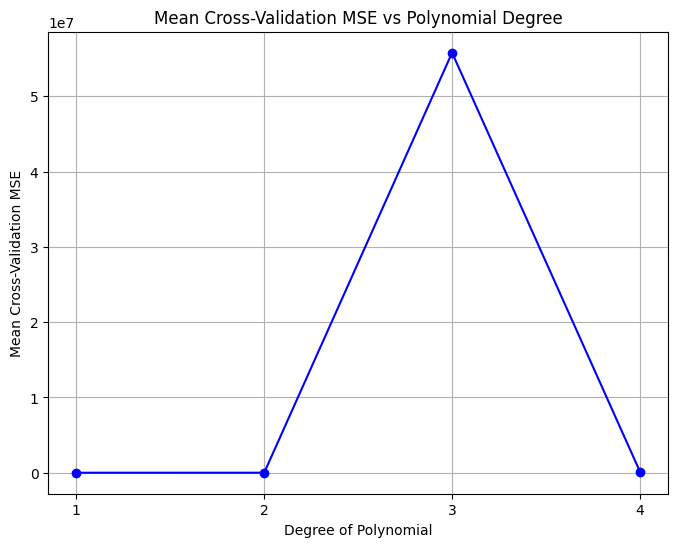

In [8]:
# --- Plot the MSE as a function of the degree ---

plt.figure(figsize=(8, 6))
plt.plot(degrees, mean_mse_per_degree, marker='o', linestyle='-', color='b')
plt.title('Mean Cross-Validation MSE vs Polynomial Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Cross-Validation MSE')
plt.xticks(degrees)
plt.grid(True)
plt.show()


In this section, I determine the best polynomial degree by selecting the one that corresponds to the lowest Mean Squared Error (MSE).

- I use np.argmin(mean_mse_per_degree) to find the index of the minimum MSE value from the list `mean_mse_per_degree.
- Then, I access the polynomial degree from the degrees array at that index to find the best degree.
- Finally, I print the best degree of the polynomial, which indicates the optimal complexity of the model that minimizes the MSE based on the cross-validation results. This helps in making an informed decision for fitting the final model.

In [9]:
# --- Select the best degree based on lowest MSE ---

best_degree = degrees[np.argmin(mean_mse_per_degree)]
print(f"Best degree of polynomial: {best_degree}")


Best degree of polynomial: 1


**Explanation**

In this section, I create the final model pipeline using the best polynomial degree determined earlier.

- I initialize a Pipeline` called best_pipe, which consists of two steps:
  - The first step uses PolynomialFeatures with the best degree identified, transforming the input features into polynomial features of that degree.
  - The second step employs LinearRegression` to fit the transformed features to the target variable.

This pipeline structure allows for streamlined model training, where I can easily fit the best model to the training data and use it for predictions or evaluations later on. It encapsulates the preprocessing and modeling steps in one cohesive unit.

In [10]:
# Create the best model pipeline
best_pipe = Pipeline(steps=[('preprocessor', PolynomialFeatures(degree=best_degree)),
                            ('estimator', LinearRegression())])

**Explanation**

In this section, I fit the best model pipeline (best_pipe) on the entire training dataset by calling best_pipe.fit(X_train, y_train). This trains the model using all the training data, applying the polynomial transformation and fitting the linear regression model, preparing it for predictions on new data.

In [11]:
# Fit the model on the full training data
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', PolynomialFeatures(degree=1)),
                ('estimator', LinearRegression())])

**Explanation**

In this section, I use the fitted model pipeline (best_pipe) to make predictions on the test set by calling best_pipe.predict(X_test). This generates the predicted target values (`y_test_pred) for the test data, allowing me to evaluate the model's performance on unseen data.

In [12]:
# Predict on the test set
y_test_pred = best_pipe.predict(X_test)

**Explanation**

In this section, I evaluate the model's performance on the test set:

- I calculate the Mean Squared Error (MSE) by comparing the actual target values (y_test) with the predicted values (y_test_pred) using mean_squared_error(). The result is stored in mse_test`.
- I then compute the Root Mean Squared Error (RMSE) by taking the square root of the MSE.
- Finally, I print the evaluation results, including the MSE and RMSE, along with the best polynomial degree used. This provides insights into how well the model performs on unseen data.

In [13]:
# Calculate MSE on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print(f"\nTest Set Evaluation with Degree {best_degree}:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")


Test Set Evaluation with Degree 1:
MSE: 2886.07
RMSE: 53.72


# **Description**

3. Describe your process
Process Description:

Step 1: We split the dataset into training and test sets. Then, using StratifiedKFold, we split the training set into 5 folds for cross-validation.
Step 2: For each degree (1 to 4), we use a pipeline with PolynomialFeatures and LinearRegression. The model is trained on 4 folds and validated on the 5th. We calculate the MSE for each fold and compute the mean MSE for that degree.
Step 3: We plot the mean MSE values against the polynomial degrees to visualize which degree gives the lowest error.
Step 4: The degree with the lowest mean MSE is selected as the best polynomial degree.
Step 5: Finally, we retrain the model using the best degree on the entire training set and evaluate it on the test set.
This approach ensures that the best degree is chosen based on cross-validation performance, and the plot confirms that choice visually.

# **The Complete Code**

Degree 1, Mean MSE: 3059.12
Degree 2, Mean MSE: 4821.44
Degree 3, Mean MSE: 55791550.46
Degree 4, Mean MSE: 149958.86


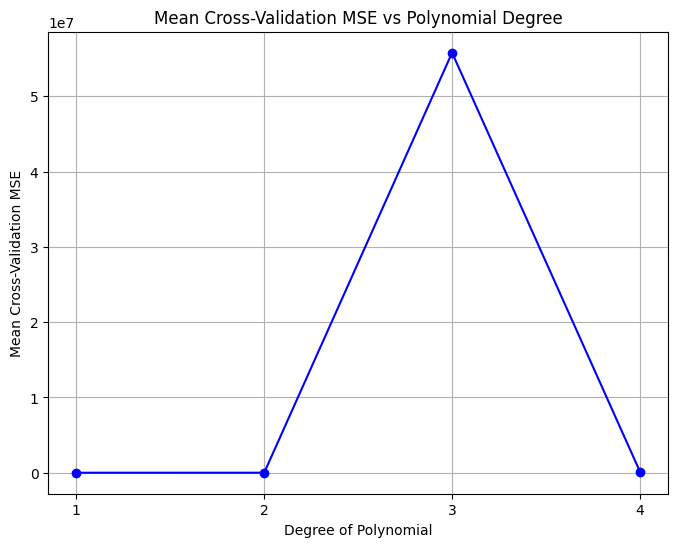

Best degree of polynomial: 1

Test Set Evaluation with Degree 1:
MSE: 2886.07
RMSE: 53.72


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010, shuffle=True)

# Create the StratifiedKFold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1010)

# Range of polynomial degrees to test
degrees = [1, 2, 3, 4]

# To store mean MSE for each degree
mean_mse_per_degree = []

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010, shuffle=True)

# Create the StratifiedKFold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1010)

# Range of polynomial degrees to test
degrees = [1, 2, 3, 4]

# To store mean MSE for each degree
mean_mse_per_degree = []

# Loop through the polynomial degrees
for degree in degrees:
    scores = []

    # Create a pipeline for each degree of polynomial
    pipe = Pipeline(steps=[('preprocessor', PolynomialFeatures(degree=degree)),
                           ('estimator', LinearRegression())])

    # Perform cross-validation
    for i, (train_index, val_index) in enumerate(skf.split(X_train, np.digitize(y_train, bins=np.percentile(y_train, [50])))):
        # Fit the model on the training fold
        pipe.fit(X_train[train_index], y_train[train_index])

        # Predict on the validation fold
        y_pred = pipe.predict(X_train[val_index])

        # Calculate MSE for the validation fold
        mse = mean_squared_error(y_train[val_index], y_pred)
        scores.append(mse)

    # Calculate mean MSE for this degree
    mean_mse = np.mean(scores)
    mean_mse_per_degree.append(mean_mse)
    print(f"Degree {degree}, Mean MSE: {mean_mse:.2f}")

# --- Plot the MSE as a function of the degree ---

plt.figure(figsize=(8, 6))
plt.plot(degrees, mean_mse_per_degree, marker='o', linestyle='-', color='b')
plt.title('Mean Cross-Validation MSE vs Polynomial Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Cross-Validation MSE')
plt.xticks(degrees)
plt.grid(True)
plt.show()

# --- Select the best degree based on lowest MSE ---

best_degree = degrees[np.argmin(mean_mse_per_degree)]
print(f"Best degree of polynomial: {best_degree}")

# --- Evaluate on test set using the best degree ---

# Create the best model pipeline
best_pipe = Pipeline(steps=[('preprocessor', PolynomialFeatures(degree=best_degree)),
                            ('estimator', LinearRegression())])

# Fit the model on the full training data
best_pipe.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_pipe.predict(X_test)

# Calculate MSE on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print(f"\nTest Set Evaluation with Degree {best_degree}:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
